In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Exploratory Data Analysis (EDA) - Assignment</b></font> 

# Given Dataset

Download and load this dataset: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv)

Look at the [Data Dictionary](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt)

# Assignment

For the given dataset, perform EDA:

 1. Checkout the data in terms of size, columns, etc...
 2. Define the business problem
 3. Define the dependent variable.
 4. Define the categorical and continuous features (based on business logic) - You can choose 5 from each type
 **The rest of the questions refer to a subset of the house prices dataset that include the 10 features that you chose + dependent variable**
 5. Generate general summary statistics 
 6. Look at the distribution of missing values
 7. Look at the number of unique values per categorical column
 8. Perform data integrity checks
 9. Extract 2 more features from the data, look at it's distribution, note missing values, define if it is categorical or continuous, and look at the summary statistics of it.
 10. Look at the distribution of each feature (make different plots for continuous and categorical features) - Keep only the interesting plots
 11. Look at the distribution of the data in comparison to the dependent variable - **Keep only the interesting plots**
 12. Look at the distribution of features against each other (inter-correlations) - **Keep only the interesting plots**

<div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>

In [552]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from bubble_plot.utils import describe_categorical_values



### 0 . At first we will read csv file and will view a few rows of the data

In [553]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Checkout the data in terms of size, columns, etc...

In [554]:
print("Boston housing dataset has {} data points(rows) with {} variables(columns/features) each.".format(*df.shape))

Boston housing dataset has 1460 data points(rows) with 81 variables(columns/features) each.


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see that data has 81 features: 
 with types: float64(3), int64(35), object(43)

In [556]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


  We see from above that LotFrontage, Alley, FireplaceQu, PoolQC, Fence etc. are some variables having Null values.

let's see more statistics 

In [557]:

numerical_columns = df.describe().columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

 View the most frequent categories for the categorical features - notice missing values

In [558]:
numerical_columns = df.describe().columns
numerical_columns
describe_categorical_values(df, non_interesting_columns=numerical_columns, num_categories=7)

,0,1,2,3,4,5,6
MSZoning,RL: 79%,RM: 15%,FV: 4%,RH: 1%,C (all): 1%,None,None
Street,Pave: 100%,Grvl: 0%,None,None,None,None,None
Alley,nan: 94%,Grvl: 3%,Pave: 3%,None,None,None,None
LotShape,Reg: 63%,IR1: 33%,IR2: 3%,IR3: 1%,None,None,None
LandContour,Lvl: 90%,Bnk: 4%,HLS: 3%,Low: 2%,None,None,None
Utilities,AllPub: 100%,NoSeWa: 0%,None,None,None,None,None
LotConfig,Inside: 72%,Corner: 18%,CulDSac: 6%,FR2: 3%,FR3: 0%,None,None
LandSlope,Gtl: 95%,Mod: 4%,Sev: 1%,None,None,None,None
Neighborhood,NAmes: 15%,CollgCr: 10%,OldTown: 8%,Edwards: 7%,Somerst: 6%,Gilbert: 5%,NridgHt: 5%
Condition1,Norm: 86%,Feedr: 6%,Artery: 3%,RRAn: 2%,PosN: 1%,RRAe: 1%,PosA: 1%


 ### 2. Define the business problem

 Very well... Now we can think about home prices and our job to find features which has a correlation with them.

It will be our business problem: to find features on which we can predict the price



### 3. Let's define the dependent variables
we will plot correlation at first for all the features

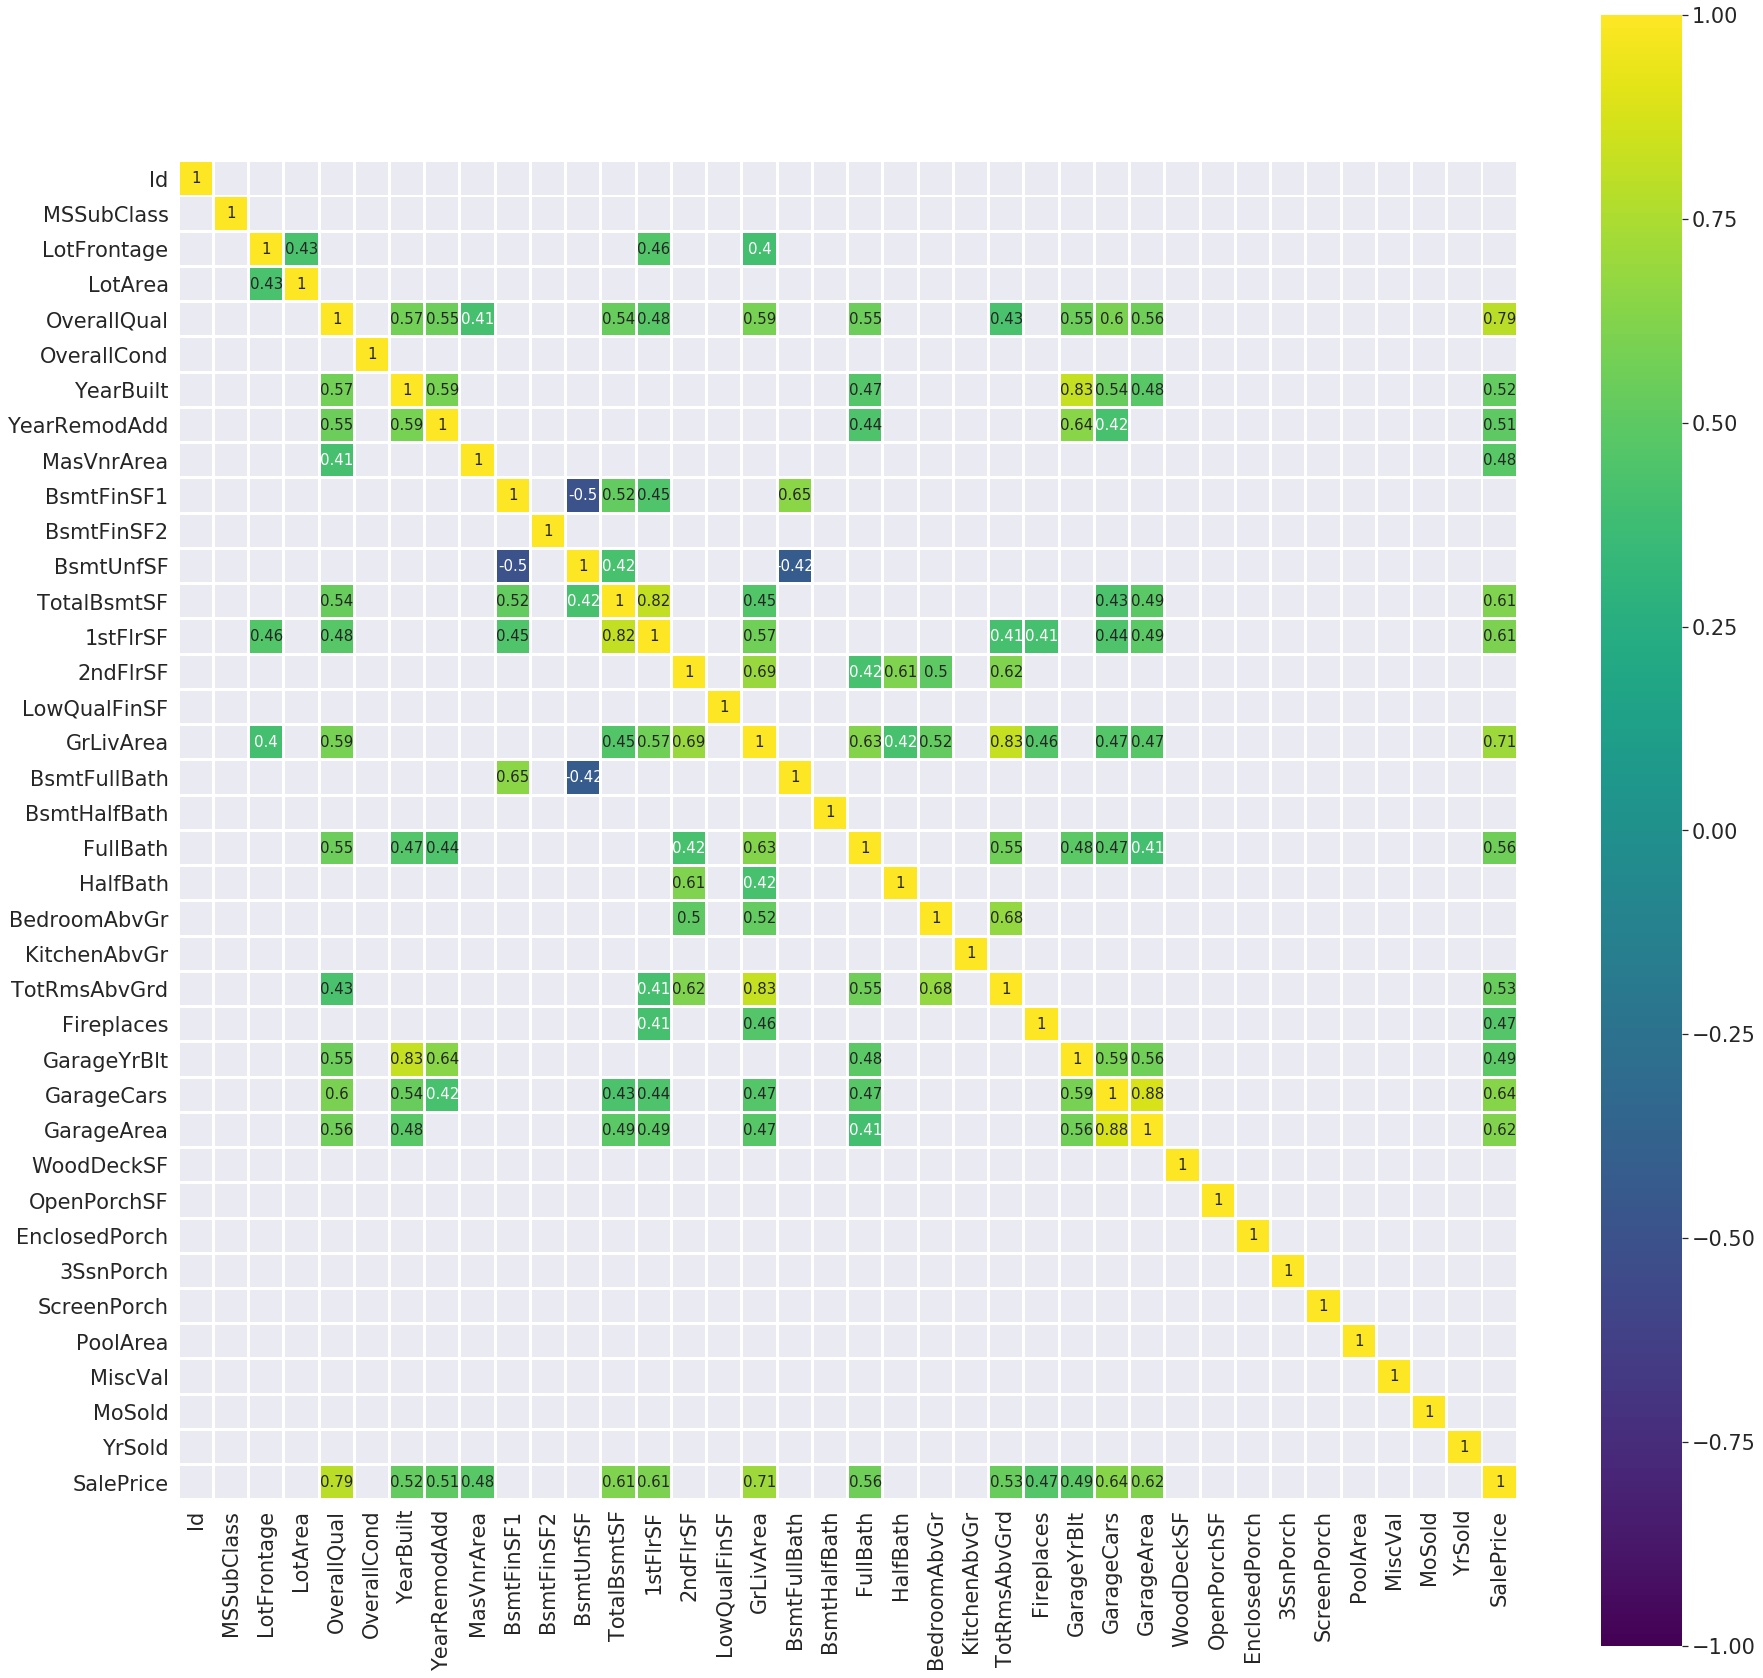

In [559]:
corr = df.corr() # We already examined SalePrice correlations
f = plt.figure(figsize=(30, 30))

sns.set(font_scale=1.9)
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=2,
            annot=True, annot_kws={"size": 15}, square=True);


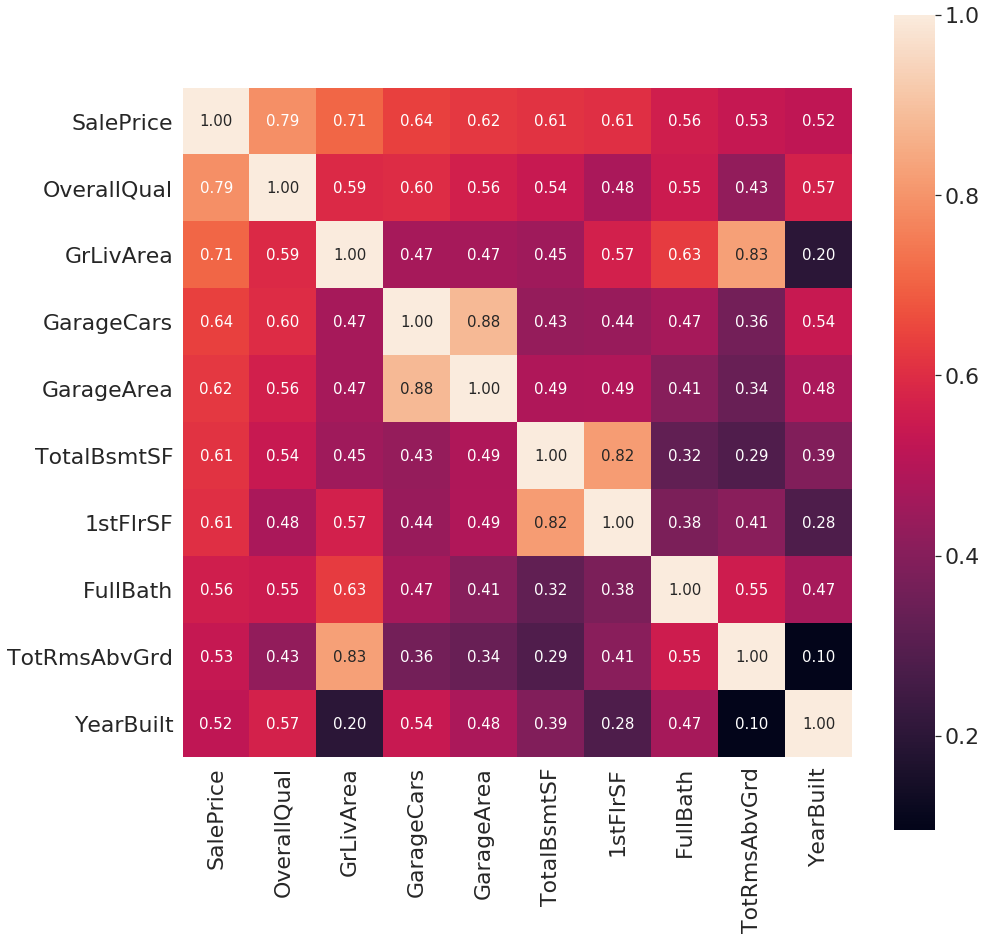

In [560]:
k = 10#num of features to show
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We see that there are a lot of numerical featureas have correlated with our dependent variable
    
So we can now chose those features, which will help us to predict the price


 
### 4. The categorical and continuous features (based on business logic) - we will choose 5 from each type
 **The rest of the questions refer to a subset of the house prices dataset that include the 10 features that we chose + dependent variable**


#### Our categorical features will be:
1. OverallQual: Rates the overall material and finish of the house
2. MSZoning: Identifies the general zoning classification of the sale.	
3. BldgType: Type of dwelling
4. Neighborhood: Physical locations within Ames city limits
5. LotConfig: Lot configuration

#### and continuous features will be:
6. TotRmsAbvGrd: Total rooms
 above grade (does not include bathrooms)
7. GrLivArea: Above grade (ground) living area square feet
8. TotalBsmtSF: Total square feet of basement area
9. 1stFlrSF: First Floor square feet
10. YearBuilt: Original construction date
11. SalePrice

In [561]:
house_price = df[['OverallQual','MSZoning','BldgType','Neighborhood','LotConfig','TotRmsAbvGrd','GrLivArea','TotalBsmtSF','1stFlrSF','YearBuilt', 'SalePrice']]
house_price.head()

,OverallQual,MSZoning,BldgType,Neighborhood,LotConfig,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,SalePrice
0,7,RL,1Fam,CollgCr,Inside,8,1710,856,856,2003,208500
1,6,RL,1Fam,Veenker,FR2,6,1262,1262,1262,1976,181500
2,7,RL,1Fam,CollgCr,Inside,6,1786,920,920,2001,223500
3,7,RL,1Fam,Crawfor,Corner,7,1717,756,961,1915,140000
4,8,RL,1Fam,NoRidge,FR2,9,2198,1145,1145,2000,250000


### 5. Let's generate general summary statistics 

In [562]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   BldgType      1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   LotConfig     1460 non-null   object
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   YearBuilt     1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 125.6+ KB


In [563]:
house_price.describe(include='all')

,OverallQual,MSZoning,BldgType,Neighborhood,LotConfig,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,SalePrice
count,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
unique,NaN,5,5,25,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,RL,1Fam,NAmes,Inside,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1151,1220,225,1052,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.099315,NaN,NaN,NaN,NaN,6.517808,1515.463699,1057.429452,1162.626712,1971.267808,180921.195890
std,1.382997,NaN,NaN,NaN,NaN,1.625393,525.480383,438.705324,386.587738,30.202904,79442.502883
min,1.000000,NaN,NaN,NaN,NaN,2.000000,334.000000,0.000000,334.000000,1872.000000,34900.000000
25%,5.000000,NaN,NaN,NaN,NaN,5.000000,1129.500000,795.750000,882.000000,1954.000000,129975.000000
50%,6.000000,NaN,NaN,NaN,NaN,6.000000,1464.000000,991.500000,1087.000000,1973.000000,163000.000000
75%,7.000000,NaN,NaN,NaN,NaN,7.000000,1776.750000,1298.250000,1391.250000,2000.000000,214000.000000


###  6. Let's look at the distribution of missing values

let's visualise the percentage of missing values

In [564]:
for var in house_price.columns:
    if house_price[var].isnull().sum()>0:
        print(var, house_price[var].isnull().mean())

exactly: nothing! no Nans

let's check it in different way

In [565]:
house_price.isna().sum() 

OverallQual     0
MSZoning        0
BldgType        0
Neighborhood    0
LotConfig       0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
YearBuilt       0
SalePrice       0
dtype: int64

 We can see that there no NaNs  or missing values in our new dataset

but here what we  had at the begining:

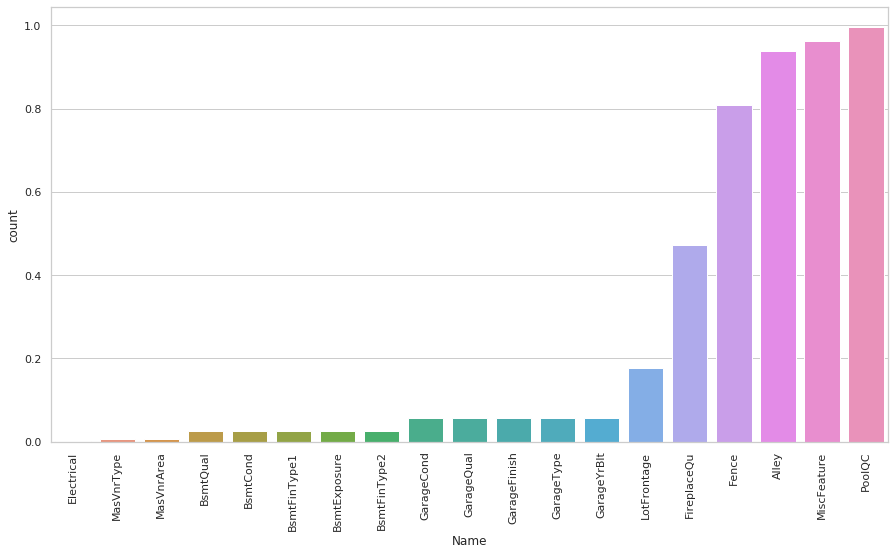

In [566]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)

#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
plt.figure(figsize=(15,8))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

###  7. Let's look at the number of unique values per categorical column

In [567]:
house_price.describe(include=[object])

,MSZoning,BldgType,Neighborhood,LotConfig
count,1460,1460,1460,1460
unique,5,5,25,5
top,RL,1Fam,NAmes,Inside
freq,1151,1220,225,1052


##### also we can look at the % of each categorical feature

In [568]:
numerical_columns = house_price.describe().columns

describe_categorical_values(house_price, non_interesting_columns=numerical_columns, num_categories=12)

,0,1,2,3,4,5,6,7,8,9,10,11
MSZoning,RL: 79%,RM: 15%,FV: 4%,RH: 1%,C (all): 1%,None,None,None,None,None,None,None
BldgType,1Fam: 84%,TwnhsE: 8%,Duplex: 4%,Twnhs: 3%,2fmCon: 2%,None,None,None,None,None,None,None
Neighborhood,NAmes: 15%,CollgCr: 10%,OldTown: 8%,Edwards: 7%,Somerst: 6%,Gilbert: 5%,NridgHt: 5%,Sawyer: 5%,NWAmes: 5%,SawyerW: 4%,BrkSide: 4%,Crawfor: 3%
LotConfig,Inside: 72%,Corner: 18%,CulDSac: 6%,FR2: 3%,FR3: 0%,None,None,None,None,None,None,None


 here we can't see  1 categorical features 'OverallQual' , it is because the feature with rate in numbers, i.e. it  is numerical but discrete:
 
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
 so we will use anothe function to describe unique values from this missed column

In [569]:
# let's visualise the values of the numerical variables
numerical = [var for var in house_price.columns if house_price[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

# let's visualise the values of the discrete variables
discrete = []
for var in numerical:
    if len(house_price[var].unique())<20:
        print(var, ' values: ', house_price[var].unique())
        discrete.append(var)
print('And {} of them (numerical variables) are  discrete variables, i.e. categorical'.format(len(discrete)))

There are 7 numerical variables
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
And 2 of them (numerical variables) are  discrete variables, i.e. categorical


### 8. The performance of data integrity checks

In [570]:
house_price.duplicated().sum()

0

We have no duplicated rows in our dataframe or missing values

And all previous steps show that we have a very good  dataframe with full  and informative data

The colums were chosen not randomly, with base in business logic and statistical correlation. 

We checked all values of all colums and rows

So let's go on to the next step


##### first we make a list of continuous variables (from the numerical ones)

In [571]:
continuous = [var for var in numerical if var not in discrete ]
continuous

['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'SalePrice']

 let's make boxplots to visualise outliers in the continuous variables 

and histograms to get an idea of the distribution

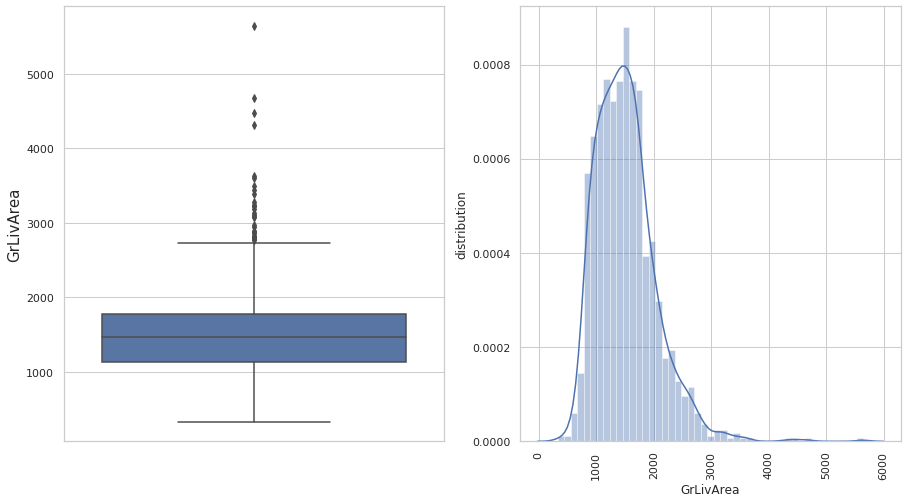

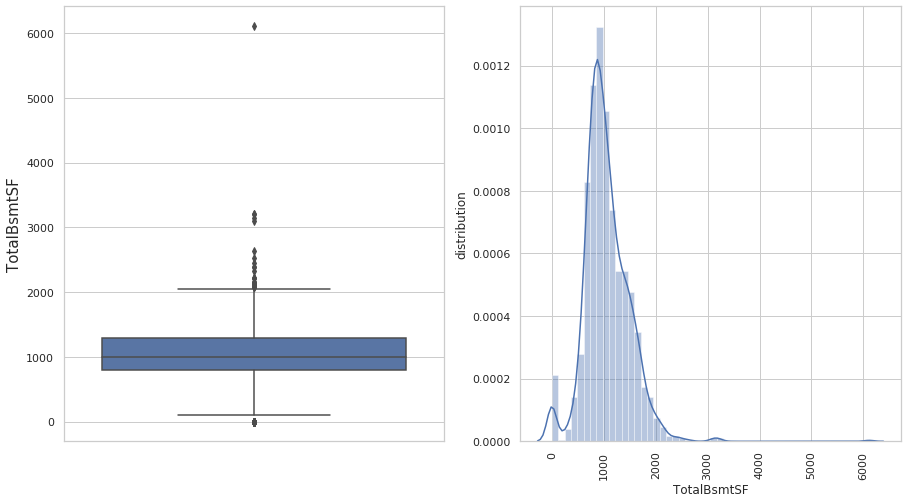

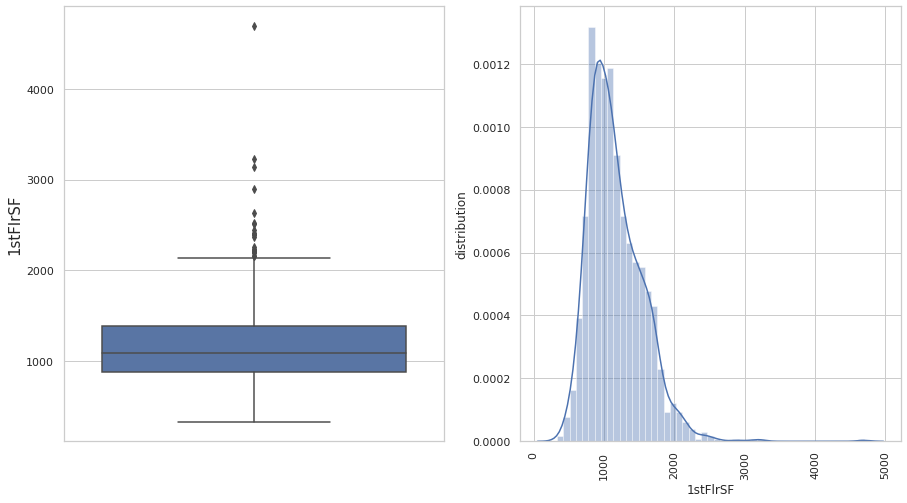

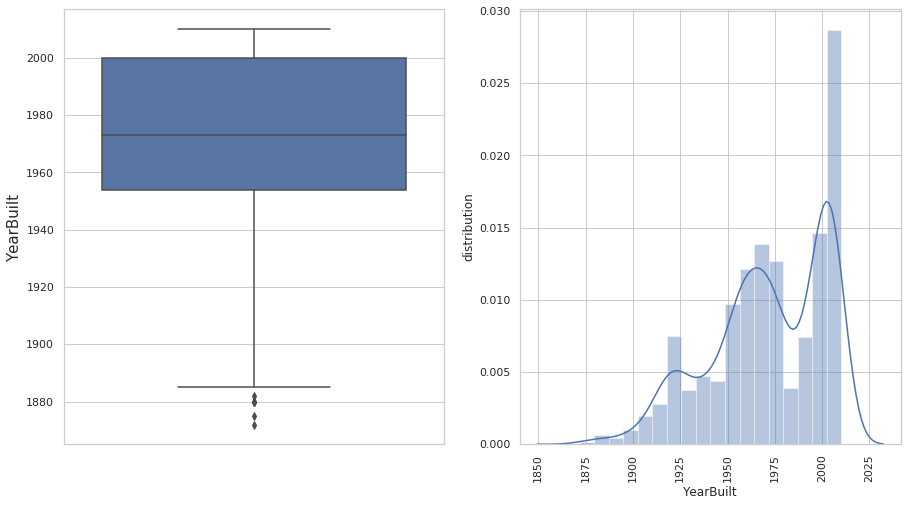

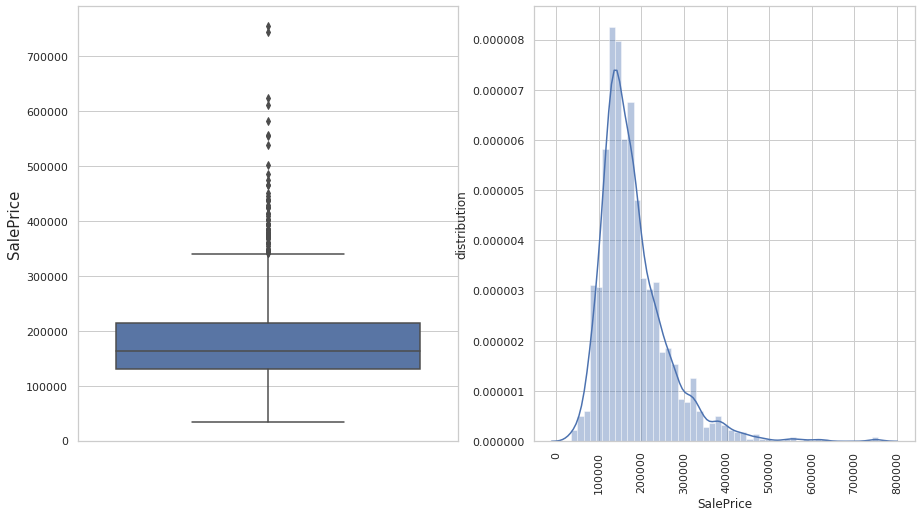

In [572]:
for var in continuous:
    plt.figure(figsize=(15,8))
    plt.subplot(1, 2, 1)
   
    sns.set_style('whitegrid')
    fig = sns.boxplot(y=house_price[var])
    fig.set_title('')
    fig.set_ylabel(var,fontsize=15)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(house_price[var])
   
    fig.set_ylabel('distribution')
    fig.set_xlabel(var)
    plt.xticks(rotation=90)


    plt.show()

 and here for categorical variables

/home/gal/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


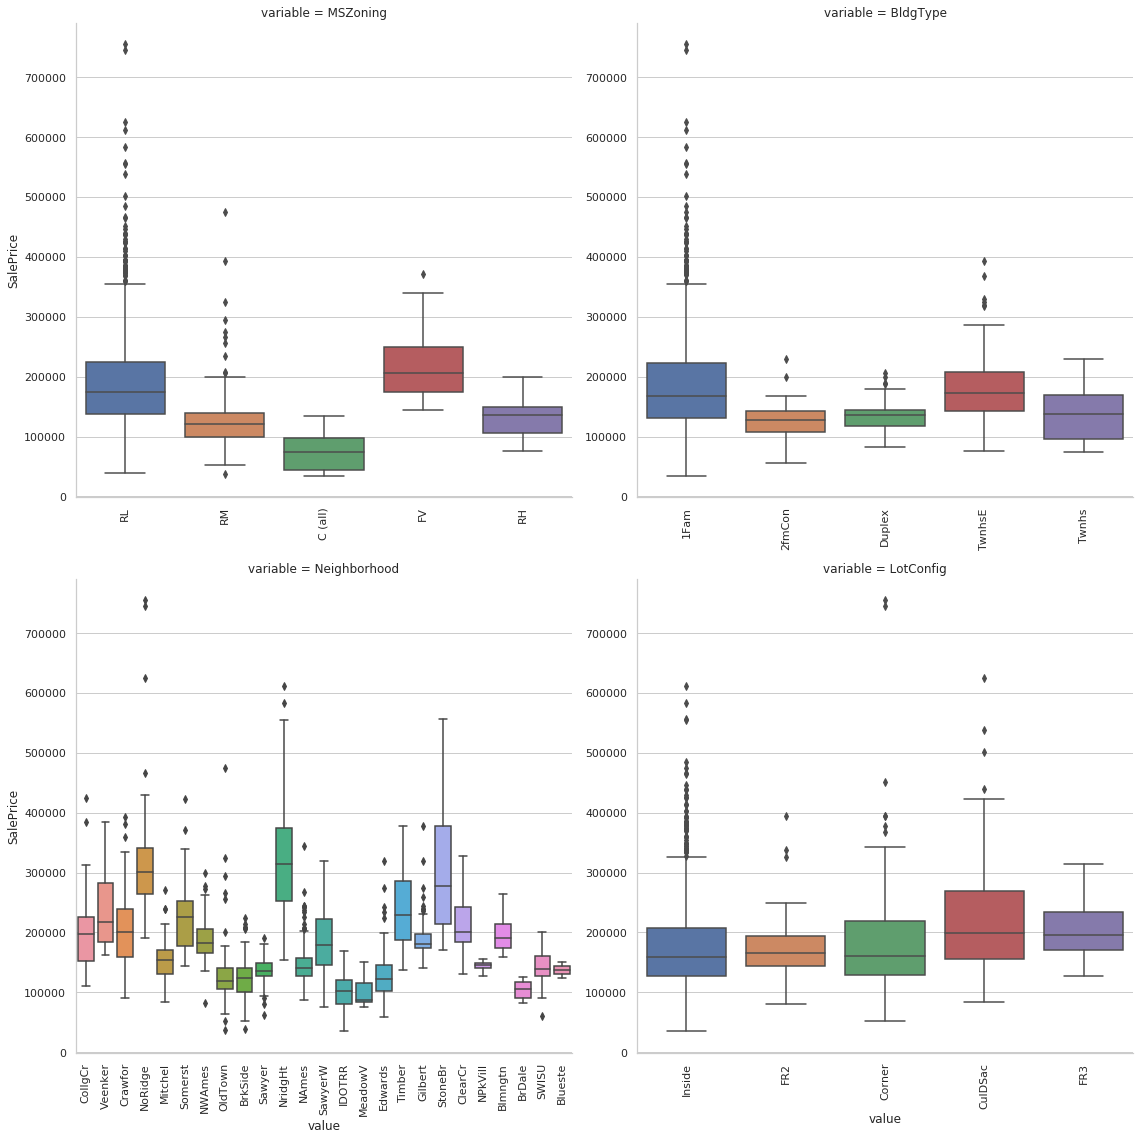

In [573]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in house_price.columns if house_price.dtypes[f] == 'object']

p = pd.melt(house_price, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=8)
g = g.map(boxplot, 'value','SalePrice')
plt.show()


There are a lot of outliers.

Outliers are rare by definition. 

If, for example, 30% of our data is outliers, then it actually means that there’s something interesting going on with our data that we need to look further into. 

But now we won't go deep in it.

### 9. Let's extract 2 more features from the data, look at it's distribution, note missing values, define if it is categorical or continuous, and look at the summary statistics of it.

 lets create a new featue, which will be categorical: Convert Sale Price variable to categorical like low,medium,high price 

In [575]:
house_price['SalePrice_Cat'] = 'low'
house_price.loc[house_price.SalePrice <= 100000,'SalePrice_Cat'] = 'low'
house_price.loc[(house_price.SalePrice > 100000) & (house_price.SalePrice <=200000),'SalePrice_Cat'] = 'medium'
house_price.loc[house_price.SalePrice > 300000,'SalePrice_Cat'] = 'high'


/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/gal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [574]:
house_price['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 let's see what it is now

In [576]:
house_price.SalePrice_Cat.describe()

count       1460
unique         3
top       medium
freq         910
Name: SalePrice_Cat, dtype: object

<Figure size 1080x576 with 0 Axes>

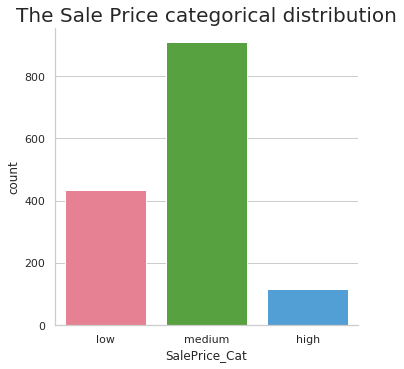

In [578]:
plt.figure(figsize=(15,8))
fig.set_title('SalePrice_Cat')
fig.set_ylabel('SalePrice_Cat',fontsize=15)
sns.catplot(x="SalePrice_Cat", kind="count", palette="husl", data=house_price)
plt.title('The Sale Price categorical distribution', fontSize=20)
plt.show()

 So in new column 'SalePrice_Cat'  we have 3 unique values and the most popular is 'medium', the column doesn't contains Nans

 Here we see that more than half  of prices (62% of values) are in the category 2 (medium) and 30% in category 1(low)

Next feature we will create will be numerical: the total living area which we can get from our new dataframe

In [579]:
house_price['LivingTotalSF']  = house_price['TotalBsmtSF'] + house_price['1stFlrSF']  + house_price['GrLivArea']

/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [495]:
house_price.describe()

,OverallQual,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,SalePrice,LivingTotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,6.517808,1515.463699,1057.429452,1162.626712,1971.267808,180921.195890,3735.519863
std,1.382997,1.625393,525.480383,438.705324,386.587738,30.202904,79442.502883,1155.731397
min,1.000000,2.000000,334.000000,0.000000,334.000000,1872.000000,34900.000000,668.000000
25%,5.000000,5.000000,1129.500000,795.750000,882.000000,1954.000000,129975.000000,2923.750000
50%,6.000000,6.000000,1464.000000,991.500000,1087.000000,1973.000000,163000.000000,3569.500000
75%,7.000000,7.000000,1776.750000,1298.250000,1391.250000,2000.000000,214000.000000,4398.000000
max,10.000000,14.000000,5642.000000,6110.000000,4692.000000,2010.000000,755000.000000,16444.000000


we see that the mean and the minimum of the total living area has a big difference, it might be because some houses have no basment

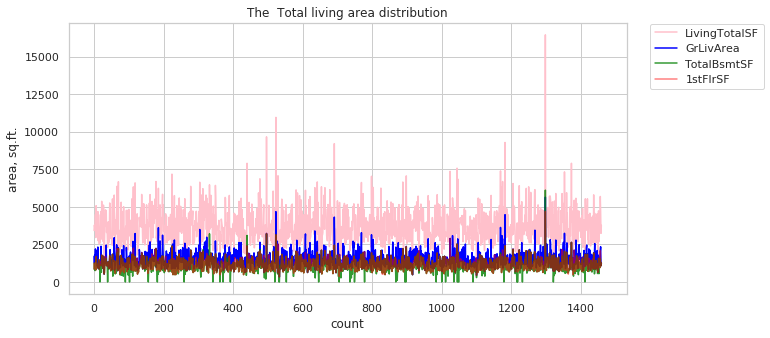

In [496]:
plt.figure(figsize=(10,5))
plt.plot(house_price['LivingTotalSF'],color='pink', label='LivingTotalSF', alpha=1)
plt.plot(house_price['GrLivArea'],color='blue', label='GrLivArea', alpha=1)
plt.plot(house_price['TotalBsmtSF'],color='green', label='TotalBsmtSF', alpha=0.8)
plt.plot(house_price['1stFlrSF'],color='red', label='1stFlrSF', alpha=0.5)

plt.title('The  Total living area distribution')   
plt.xlabel('count')
plt.ylabel('area, sq.ft.')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0.1)
plt.show()

 we see that our new variable can be used instead all others (about area) to show the global pictire in the market

### 10. Let's look at the distribution of each feature (we will make different plots for continuous and categorical features) - will keep only the interesting plots
 

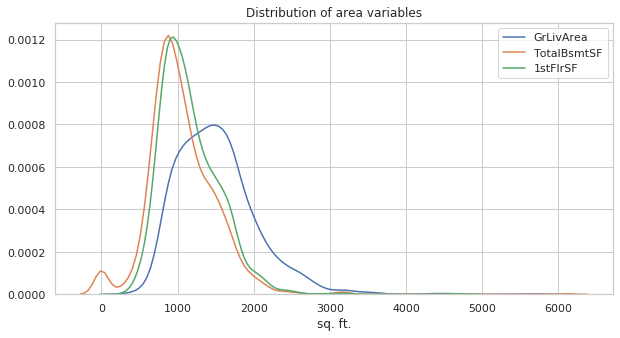

In [497]:
plt.figure(figsize=(10,5))
sns.kdeplot(house_price['GrLivArea']);
sns.kdeplot(house_price['TotalBsmtSF']);
sns.kdeplot(house_price['1stFlrSF']);
plt.xlabel('sq. ft.')
plt.title("Distribution of area variables")
plt.show()

 here we can see, that area of basement and area of the 1sf floor are have very similar distribution

grouping neighborhood variable based 

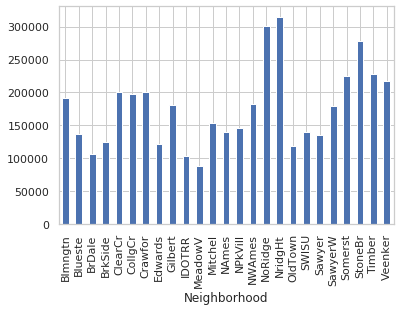

In [583]:

house_price['SalePrice'].groupby(house_price['Neighborhood']).median().plot(kind='bar')

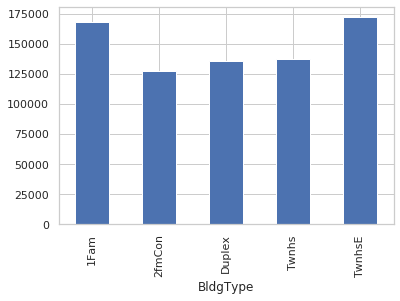

In [582]:
house_price['SalePrice'].groupby(house_price['BldgType']).median().plot(kind='bar')

If we will group by building type, we will see, that one family building and Townhouses are more expencive

### 11. Look at the distribution of the data in comparison to the dependent variable - **Keep only the interesting plots**


In [499]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value)

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax 

let's look at the price distribution by quality rate

No handles with labels found to put in legend.


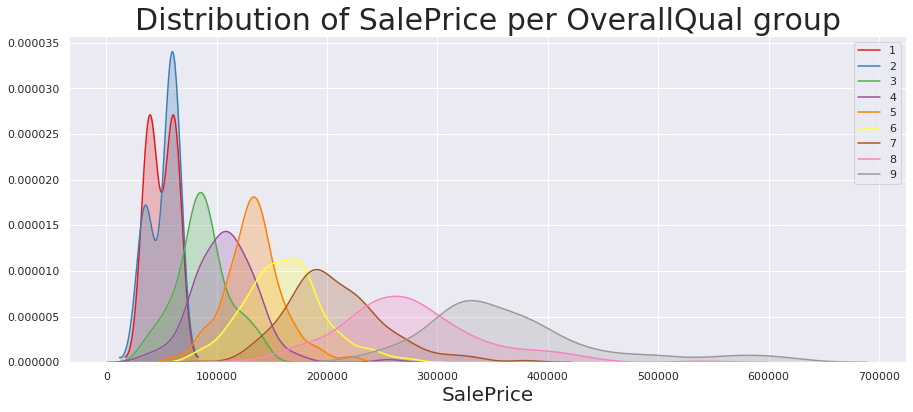

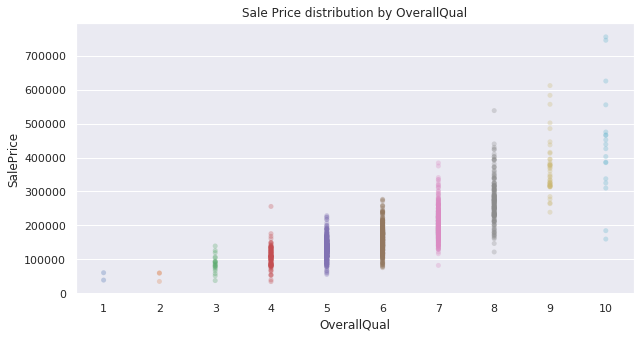

In [539]:
display_group_density_plot(groupby = 'OverallQual', \
                           on = 'SalePrice', \
                           df = house_price, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'));
plt.show()
sns.stripplot(x="OverallQual", y="SalePrice", \
              data=house_price.dropna(subset=["OverallQual"]), \
              alpha = 0.3, jitter=False);

plt.title('Sale Price distribution by OverallQual')

plt.show()

we see, that the higher quality rate the higher price

 and what will we see if check dependecy of number rooms with the price?

No handles with labels found to put in legend.


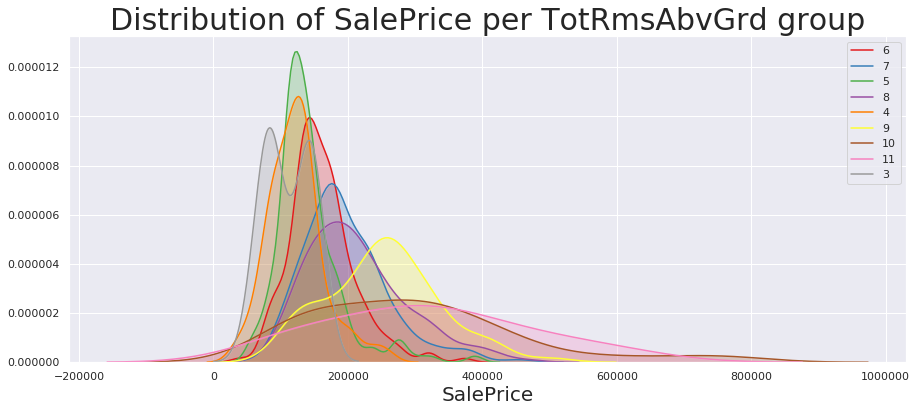

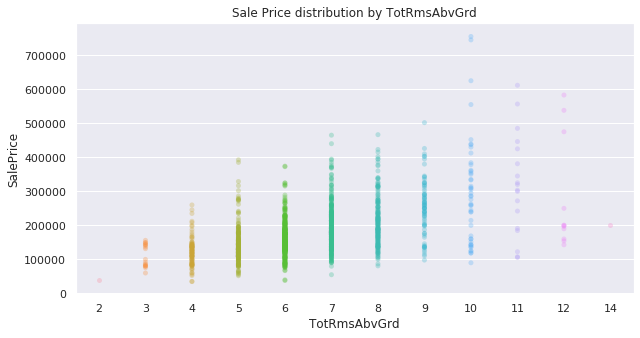

In [537]:
display_group_density_plot(groupby = 'TotRmsAbvGrd', \
                           on = 'SalePrice', \
                           df = house_price, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'));
plt.show()
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", \
              data=house_price.dropna(subset=["TotRmsAbvGrd"]), \
              alpha = 0.3, jitter=False);

plt.title('Sale Price distribution by TotRmsAbvGrd')

plt.show()

1. There are the most houses with 4,5,6,7 and 8 rooms
2. Houses with 5-6 rooms have almost the same price 
3. Houses with 7,8,9 and even 10 rooms share the very close to each other  in the price diapazone

No handles with labels found to put in legend.


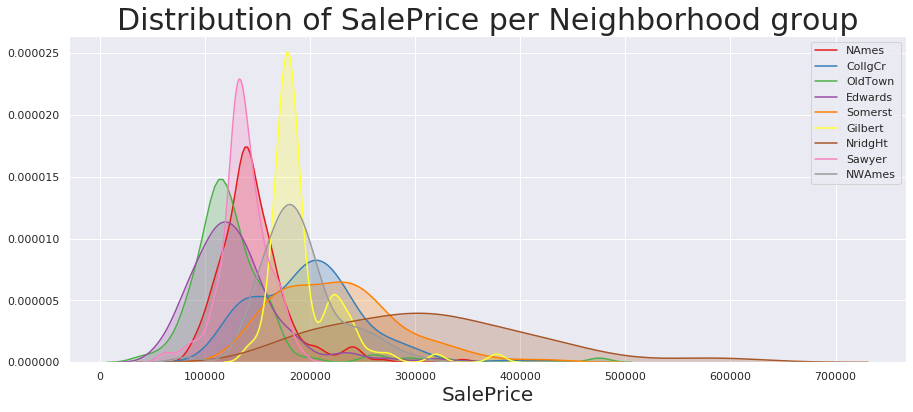

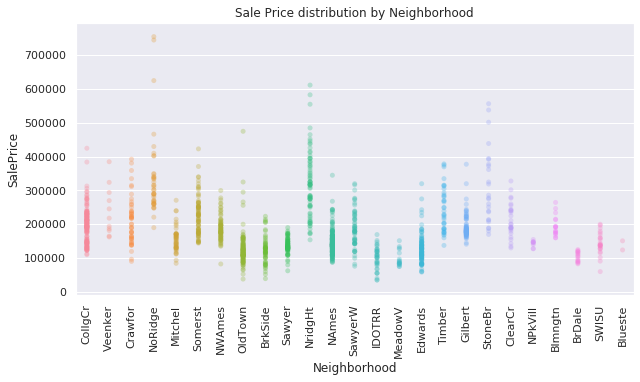

In [540]:
display_group_density_plot(groupby = 'Neighborhood', \
                           on = 'SalePrice', \
                           df = house_price, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'));
plt.show()
sns.stripplot(x="Neighborhood", y="SalePrice", \
              data=house_price.dropna(subset=["Neighborhood"]), \
              alpha = 0.3, jitter=False);
plt.xticks(rotation=90)

plt.title('Sale Price distribution by Neighborhood')

plt.show()

1. on this plot is clear that Physical locations with Northridge Heights, Northridge, Stone Brook more expensive

2. and locations Old Town, Iowa DOT and Rail Road and Brookside are very cheap

###  12. Look at the distribution of features against each other (inter-correlations) - **Keep only the interesting plots**

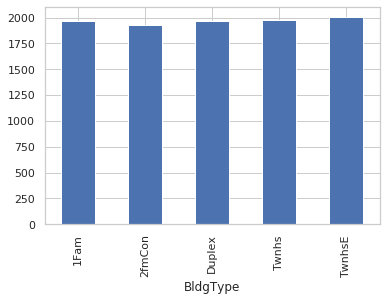

In [590]:
house_price['YearBuilt'].groupby(house_price['BldgType']).median().plot(kind='bar')

year of built is not much dependent on the building type

 we already used this plot to see the correlation in our whole dataframe, so let's look again with correlation plot on our new data

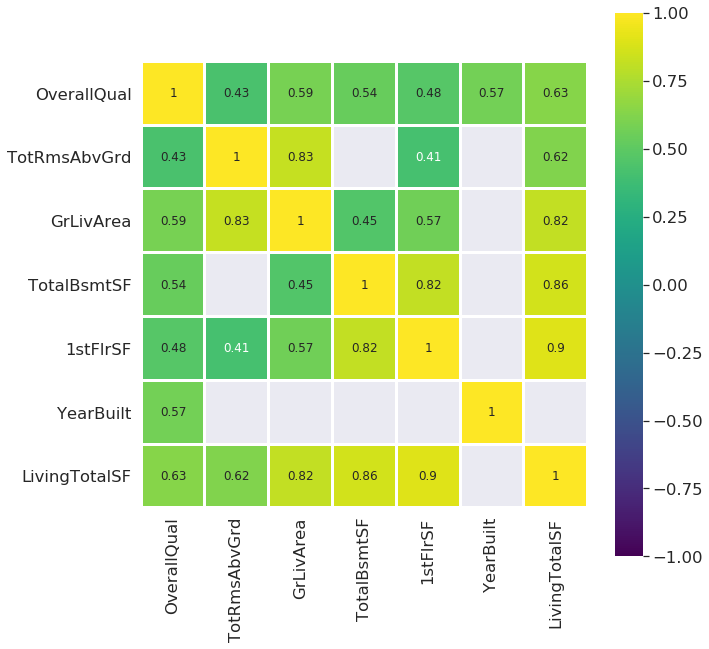

In [501]:
house= house_price.copy()
house.drop(columns=['SalePrice'],axis=1,inplace=True)
corr = house.corr() # We already examined SalePrice correlations
f = plt.figure(figsize=(10, 10))

sns.set(font_scale=1.5)
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=2,
            annot=True, annot_kws={"size": 12}, square=True);


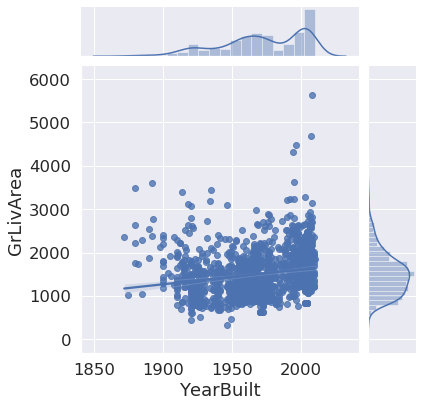

In [528]:
sns.jointplot("YearBuilt", "GrLivArea", data=house, kind='reg');

we clearly see that living area depends on a year of built and has a good correlation

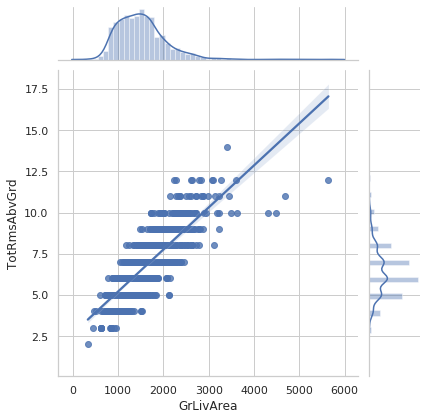

In [591]:
sns.jointplot("GrLivArea", "TotRmsAbvGrd", data=house, kind='reg');

and also living area has a strong connection with  amount rooms in the house 